<a href="https://colab.research.google.com/github/gregomatias/ML_TelcoCustomerChurn/blob/main/%E2%80%9CProyectoDS_Parte1_GregoMatias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

#from google.colab import drive
#drive.mount('/content/drive')
#!ls /content/drive/MyDrive/Colab\ Notebooks
#file_path = '/content/drive/MyDrive/Colab\ Notebooks/data.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Specify the path to your CSV file

#/TelcoCustomerChurn.csv
csv_file_path = 'https://raw.githubusercontent.com/gregomatias/ML_TelcoCustomerChurn/main/TelcoCustomerChurn.csv'  # <--- Change this to your CSV file path

# Read the CSV file into a pandas DataFrame
try:
    df = pd.read_csv(csv_file_path)
    print(f"Successfully loaded '{csv_file_path}'.")
    print("First 5 rows of the DataFrame:")
    # Normalizacion de los datos
    df.columns = (
    df.columns
    .str.lower()          # pasa a minúsculas
    .str.strip()          # saca espacios al inicio/fin
    .str.replace(' ', '_', regex=False)  # reemplaza espacios por _
)

    print(df.head())
except FileNotFoundError:
    print(f"Error: The file '{csv_file_path}' was not found. Please check the path.")
except Exception as e:
    print(f"An error occurred while reading the CSV file: {e}")




Successfully loaded 'https://raw.githubusercontent.com/gregomatias/ML_TelcoCustomerChurn/main/TelcoCustomerChurn.csv'.
First 5 rows of the DataFrame:
   customerid  gender  seniorcitizen partner dependents  tenure phoneservice  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      multiplelines internetservice onlinesecurity  ... deviceprotection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...          

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.describe()

,seniorcitizen,tenure,monthlycharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# Traduzco los nombres al castellano y con guiones

In [ ]:
traducciones = {
    "customerid": "id_cliente",
    "gender": "genero",
    "seniorcitizen": "adulto_mayor",
    "partner": "pareja",
    "dependents": "dependientes",
    "tenure": "antiguedad_meses",
    "phoneservice": "servicio_telefono",
    "multiplelines": "lineas_multiples",
    "internetservice": "tipo_internet",
    "onlinesecurity": "seguridad_online",
    "onlinebackup": "backup_online",
    "deviceprotection": "proteccion_dispositivo",
    "techsupport": "soporte_tecnico",
    "streamingtv": "tv_streaming",
    "streamingmovies": "peliculas_streaming",
    "contract": "tipo_contrato",
    "paperlessbilling": "facturacion_digital",
    "paymentmethod": "medio_pago",
    "monthlycharges": "cargo_mensual",
    "totalcharges": "total_cargos",
    "churn": "baja"
}

df.columns = df.columns.str.lower()
df = df.rename(columns=traducciones)
#Creo una columna que divide el cargo mensual en rango Bajo alto, de 0 a 40 bajo, de 40 a max alto
df["grupo_cargo"] = pd.cut(
    df["cargo_mensual"],
    bins=[0, 40, df["cargo_mensual"].max()],
    labels=["Bajo", "Alto"]
)

df.head()

,id_cliente,genero,adulto_mayor,pareja,dependientes,antiguedad_meses,servicio_telefono,lineas_multiples,tipo_internet,seguridad_online,...,tv_streaming,peliculas_streaming,tipo_contrato,facturacion_digital,medio_pago,cargo_mensual,total_cargos,baja,rango_cargo,grupo_cargo
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,"(18.249, 35.5]",Bajo
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.50,No,"(35.5, 70.35]",Alto
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,"(35.5, 70.35]",Alto
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,"(35.5, 70.35]",Alto
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,"(70.35, 89.85]",Alto


In [ ]:
df.genero.value_counts()

,count
genero,
Male,3555
Female,3488


# **Validación de datos nulos**


> df.isnull()

> df.isnull().sum()


Eliminar filas con valores nulos:

> df.dropna()

Eliminar columnas con valores nulos:

> df.dropna(axis=1)


In [ ]:

df.isnull().sum()


,0
id_cliente,0
genero,0
adulto_mayor,0
pareja,0
dependientes,0
antiguedad_meses,0
servicio_telefono,0
lineas_multiples,0
tipo_internet,0
seguridad_online,0


# Normailzacion
Esto convierte:

"123.45" → 123.45

" " → NaN

"" → NaN

`df["total_cargos"] = pd.to_numeric(df["total_cargos"].replace(" ", None), errors="coerce")`

In [ ]:
df["total_cargos"] = pd.to_numeric(df["total_cargos"].replace(" ", None), errors="coerce")


In [ ]:
#validar que quedo como numerico
df["total_cargos"].describe()
df["total_cargos"].isna().sum()
df["total_cargos"].dtype


dtype('float64')

# Matplotlib

In [ ]:
# Estilos
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


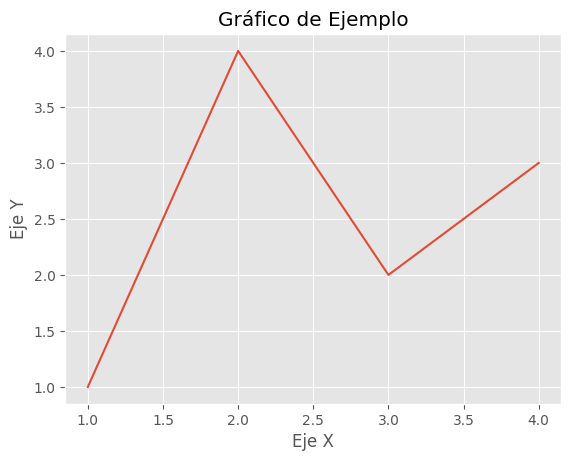

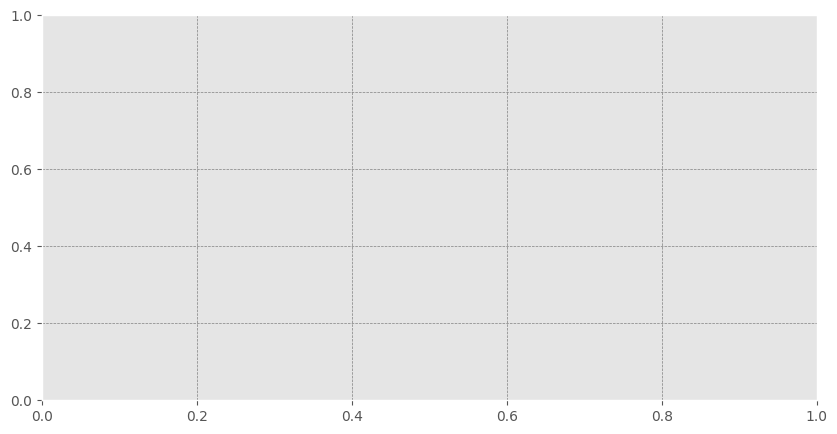

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot([1, 2, 3, 4], [1, 4, 2, 3])
ax.set_xlabel('Eje X')
ax.set_ylabel('Eje Y')
ax.set_title('Gráfico de Ejemplo')
plt.figure(figsize=(10, 5))  # Define el tamaño de la figura
plt.grid(True, color='gray', linestyle='--', linewidth=0.5)  # Configura la cuadrícula
plt.show()

# **Seaborn\**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


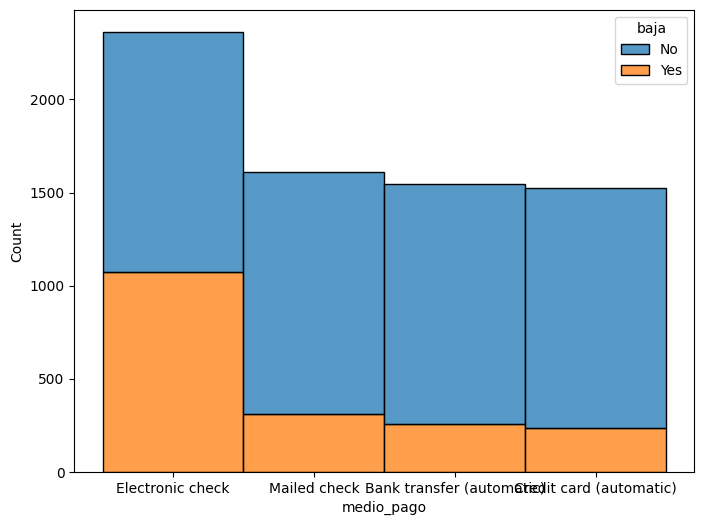

In [ ]:

# Crear la figura con el tamaño deseado
plt.figure(figsize=(8, 6))
bin_width = 10
bin_range = range(170, 250, bin_width)
# Axes-level
sns.histplot(data=df, x="medio_pago", hue="baja", multiple="stack", bins=bin_range)
stat="percent" #permite verlo en frecuencia relativa
plt.show()

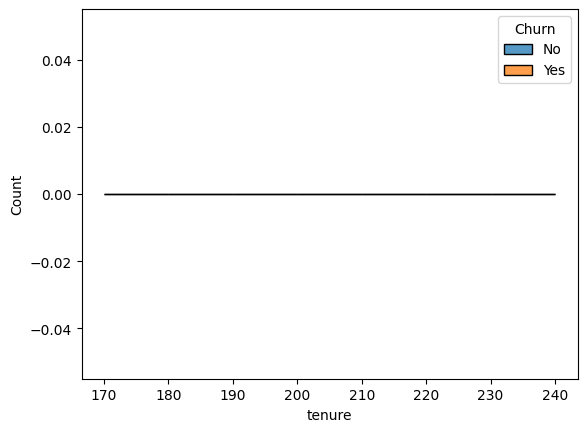

In [ ]:
sns.histplot(data=df, x="PaymentMethod", hue="Churn", multiple="stack", bins=bin_range)
stat="percent" #permite verlo en frecuencia relativa
plt.show()

# Muestral de datos
  # 10%

`> df_muestra = df.sample(frac=0.1, random_state=42) `

# nominal

`df_muestra = df.sample(n=1000, random_state=42)`

# permite repetidos

`df_muestra = df.sample(n=1000, replace=True)  `


<Axes: >

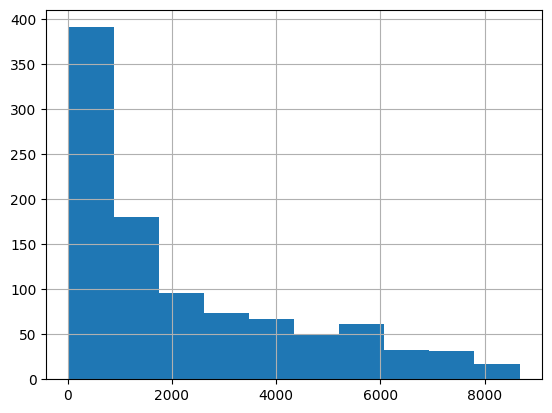

In [ ]:

df_muestra = df.sample(n=1000, random_state=42)
df_muestra['total_cargos'].hist()

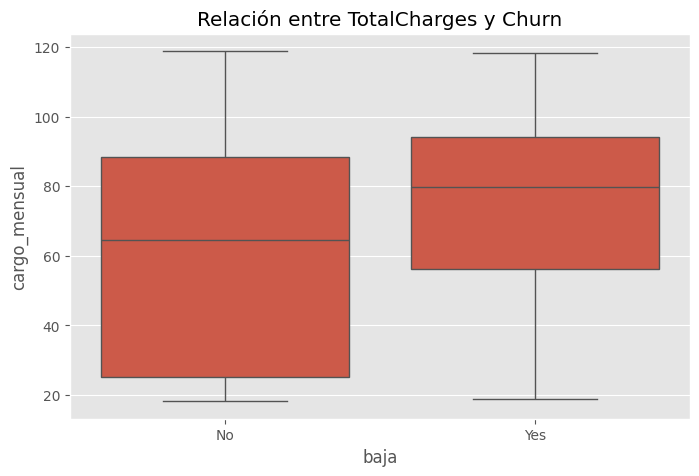

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="baja", y="cargo_mensual")
plt.title("Relación entre TotalCharges y Churn")
plt.show()

Analizar si a mayor monto mayor churn

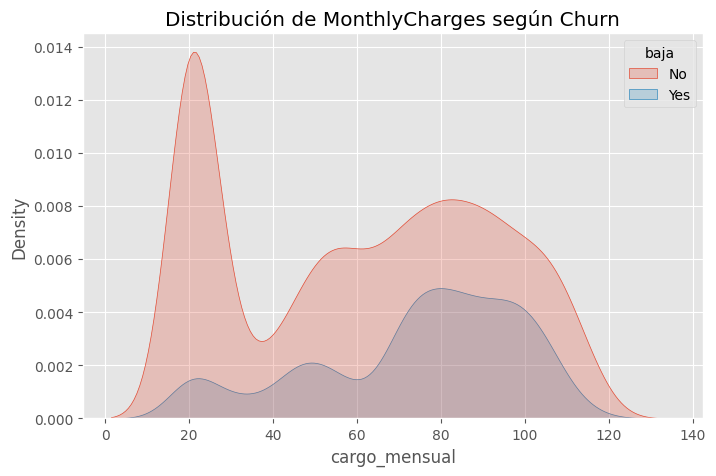

In [ ]:
#df["cargo_mensual"] = pd.to_numeric(df["cargo_mensual"], errors="coerce")
#df = df.dropna(subset=["cargo_mensual"])

plt.figure(figsize=(8,5))
sns.kdeplot(data=df, x="cargo_mensual", hue="baja", fill=True)
plt.title("Distribución de MonthlyCharges según Churn")
plt.show()


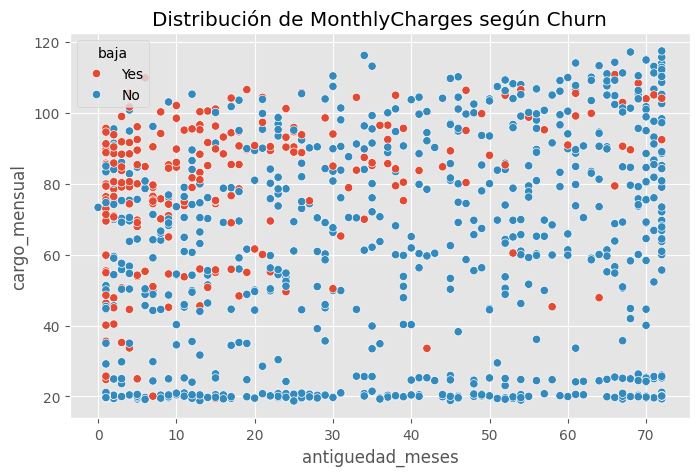

In [ ]:

plt.figure(figsize=(8,5))
sns.scatterplot(data=df_muestra, x="antiguedad_meses", y="cargo_mensual", hue="baja")
plt.title("Distribución de MonthlyCharges según Churn")
plt.show()

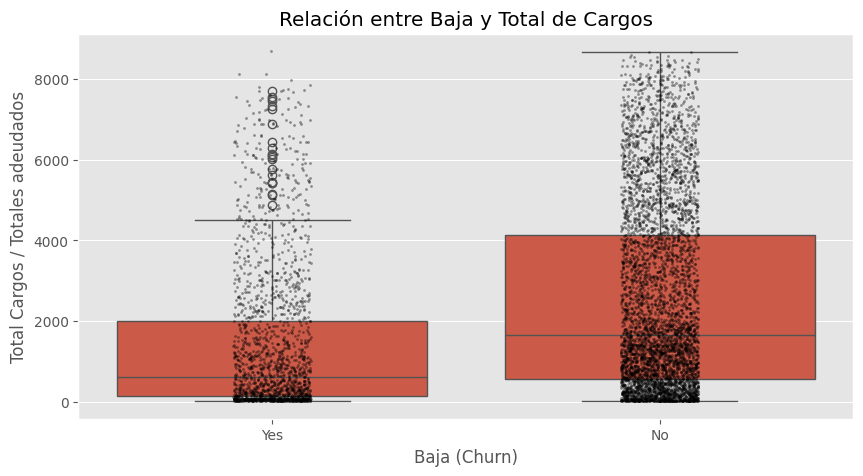

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df_muestra, x="baja", y="total_cargos")
sns.stripplot(data=df, x="baja", y="total_cargos", color="black", size=2, alpha=0.4)

plt.title("Relación entre Baja y Total de Cargos")
plt.xlabel("Baja (Churn)")
plt.ylabel("Total Cargos / Totales adeudados")

plt.show()

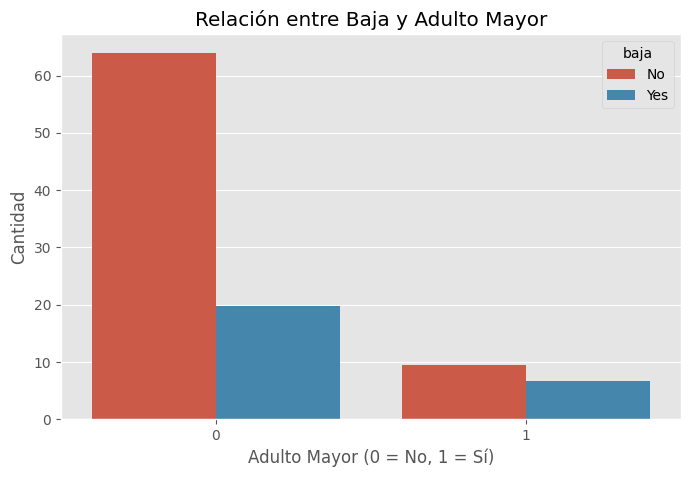

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="adulto_mayor", hue="baja",stat="percent",fill=True)

plt.title("Relación entre Baja y Adulto Mayor")
plt.xlabel("Adulto Mayor (0 = No, 1 = Sí)")
plt.ylabel("Cantidad")
plt.show()

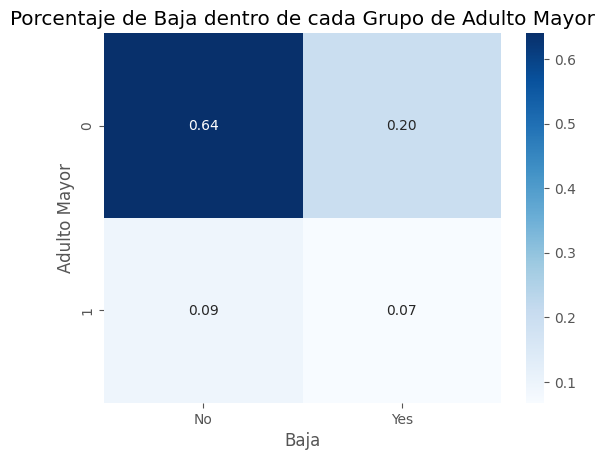

In [ ]:
tabla_pct = pd.crosstab(df["adulto_mayor"], df["baja"], normalize="index")

sns.heatmap(tabla_pct, annot=True, fmt=".2f", cmap="Blues")

plt.title("Porcentaje de Baja dentro de cada Grupo de Adulto Mayor")
plt.xlabel("Baja")
plt.ylabel("Adulto Mayor")
plt.show()


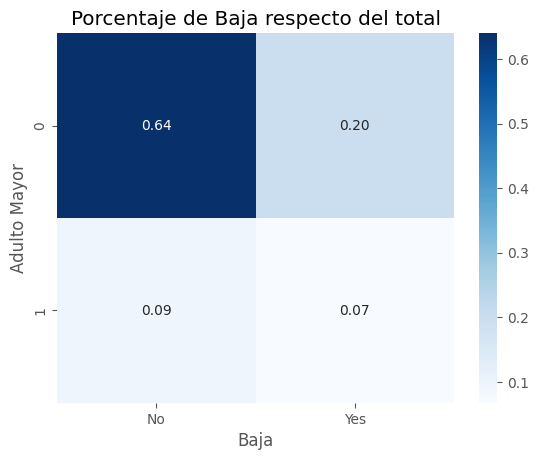

In [ ]:
tabla_pct = pd.crosstab(df["adulto_mayor"], df["baja"], normalize="all")

sns.heatmap(tabla_pct, annot=True, fmt=".2f", cmap="Blues")

plt.title("Porcentaje de Baja respecto del total")
plt.xlabel("Baja")
plt.ylabel("Adulto Mayor")
plt.show()

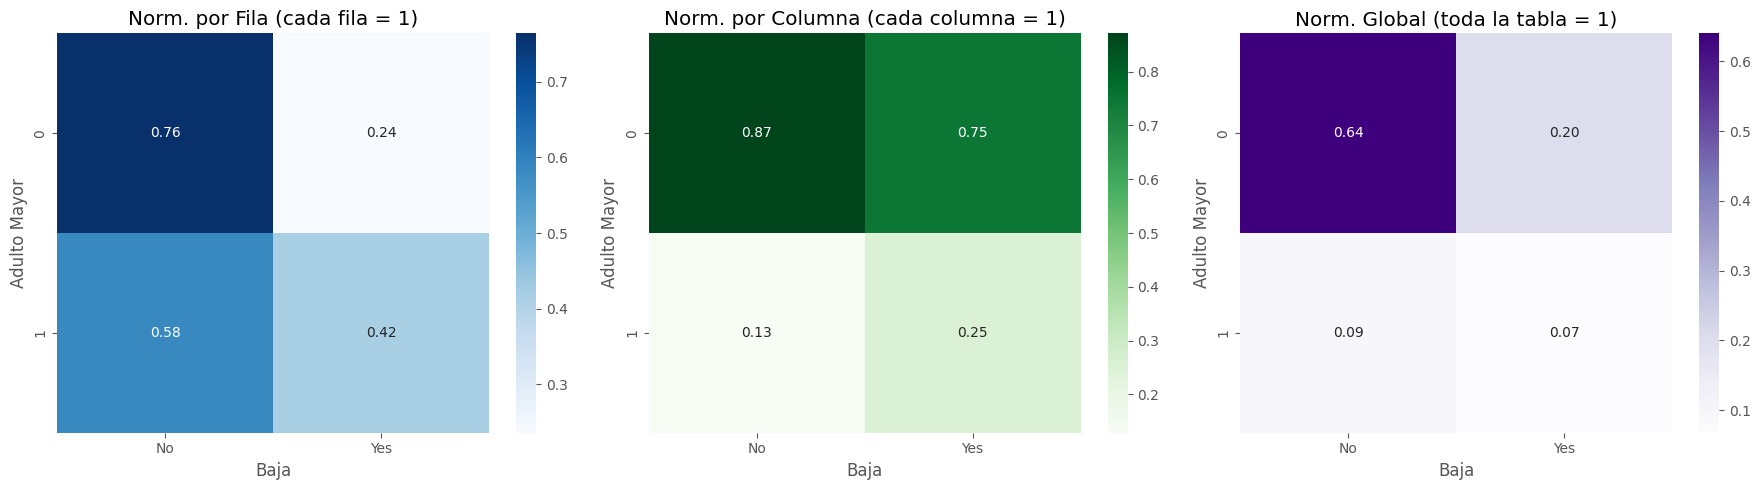

In [ ]:


# --- Tablas de contingencia ---

# 1) Normalizado por fila (cada fila suma 1)
tabla_fila = pd.crosstab(df["adulto_mayor"], df["baja"], normalize="index")

# 2) Normalizado por columna (cada columna suma 1)
tabla_columna = pd.crosstab(df["adulto_mayor"], df["baja"], normalize="columns")

# 3) Normalizado global (toda la tabla suma 1)
tabla_global = pd.crosstab(df["adulto_mayor"], df["baja"], normalize="all")

# --- Plot ---

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Heatmap 1: por fila
sns.heatmap(
    tabla_fila,
    annot=True,
    fmt=".2f",
    cmap="Blues",
    ax=axes[0]
)
axes[0].set_title("Norm. por Fila (cada fila = 1)")
axes[0].set_xlabel("Baja")
axes[0].set_ylabel("Adulto Mayor")

# Heatmap 2: por columna
sns.heatmap(
    tabla_columna,
    annot=True,
    fmt=".2f",
    cmap="Greens",
    ax=axes[1]
)
axes[1].set_title("Norm. por Columna (cada columna = 1)")
axes[1].set_xlabel("Baja")
axes[1].set_ylabel("Adulto Mayor")

# Heatmap 3: global
sns.heatmap(
    tabla_global,
    annot=True,
    fmt=".2f",
    cmap="Purples",
    ax=axes[2]
)
axes[2].set_title("Norm. Global (toda la tabla = 1)")
axes[2].set_xlabel("Baja")
axes[2].set_ylabel("Adulto Mayor")

plt.tight_layout()
plt.show()


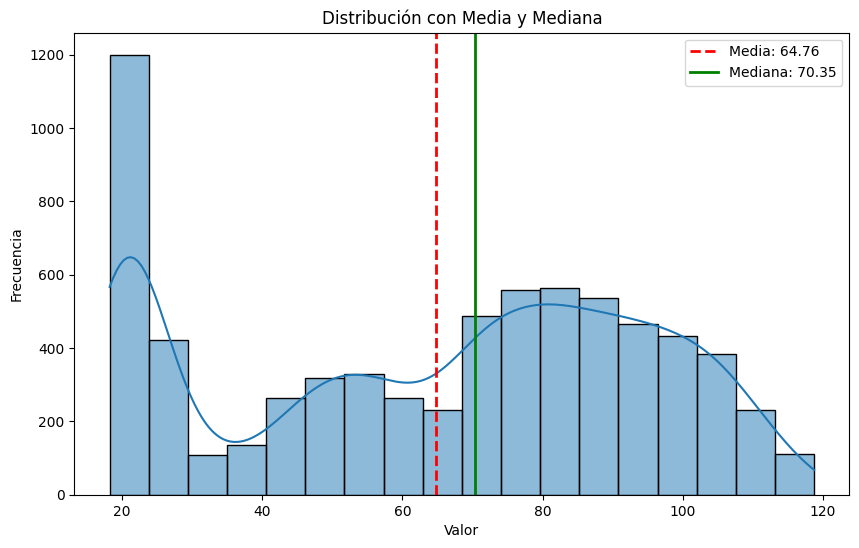

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Ejemplo: tu columna numérica
x = df['cargo_mensual'].astype(float)

plt.figure(figsize=(10,6))
sns.histplot(x, kde=True)

# Media y mediana
media = x.mean()
mediana = x.median()

# Líneas
plt.axvline(media, color='red', linestyle='--', linewidth=2, label=f"Media: {media:.2f}")
plt.axvline(mediana, color='green', linestyle='-', linewidth=2, label=f"Mediana: {mediana:.2f}")

plt.legend()
plt.title("Distribución con Media y Mediana")
plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.show()


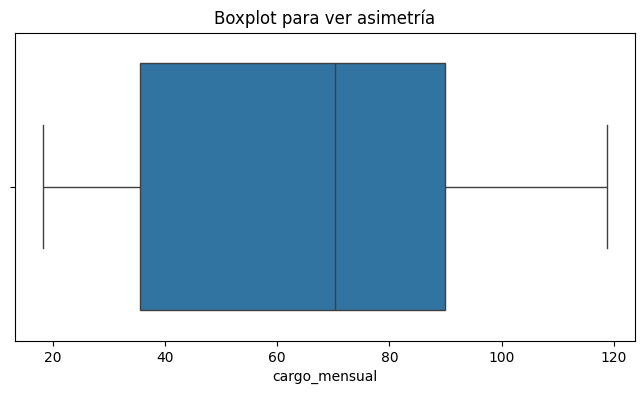

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(x=x)
plt.title("Boxplot para ver asimetría")
plt.show()


In [ ]:
df['adulto_mayor'].value_counts(normalize=True)*100

,proportion
adulto_mayor,
0,83.785319
1,16.214681


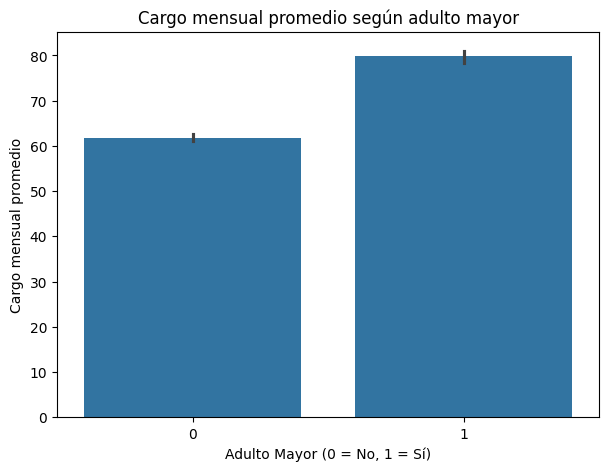

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
sns.barplot(data=df, x="adulto_mayor", y="cargo_mensual", estimator="mean")
plt.title("Cargo mensual promedio según adulto mayor")
plt.xlabel("Adulto Mayor (0 = No, 1 = Sí)")
plt.ylabel("Cargo mensual promedio")
plt.show()


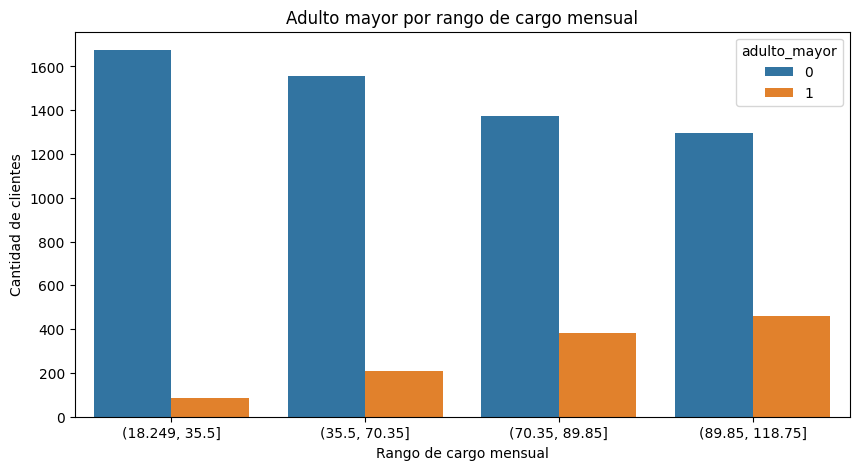

In [ ]:
df["rango_cargo"] = pd.qcut(df["cargo_mensual"], q=4)  # cuartiles

plt.figure(figsize=(10,5))
sns.countplot(data=df, x="rango_cargo", hue="adulto_mayor")
plt.title("Adulto mayor por rango de cargo mensual")
plt.xlabel("Rango de cargo mensual")
plt.ylabel("Cantidad de clientes")
plt.show()



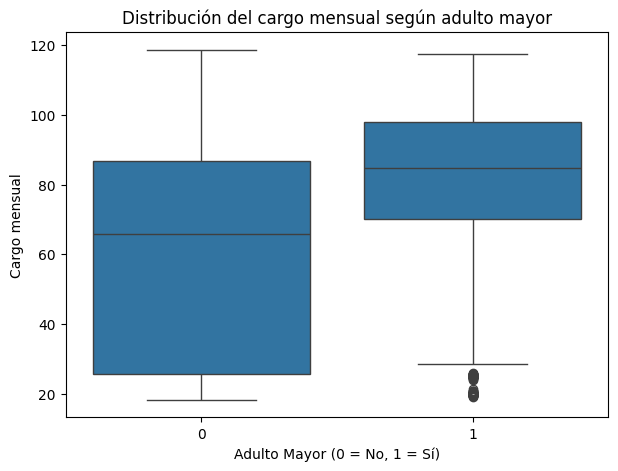

In [ ]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df, x="adulto_mayor", y="cargo_mensual")
plt.title("Distribución del cargo mensual según adulto mayor")
plt.xlabel("Adulto Mayor (0 = No, 1 = Sí)")
plt.ylabel("Cargo mensual")
plt.show()


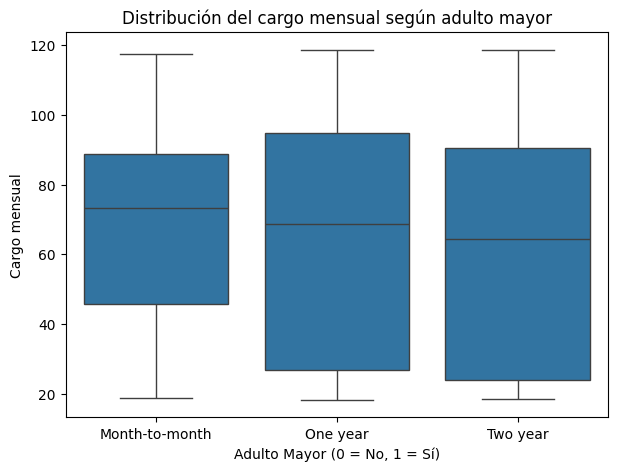

In [ ]:
df['tipo_contrato'].value_counts(normalize=True)*100


plt.figure(figsize=(7,5))
sns.boxplot(data=df, x="tipo_contrato", y="cargo_mensual")
plt.title("Distribución del cargo mensual según adulto mayor")
plt.xlabel("Adulto Mayor (0 = No, 1 = Sí)")
plt.ylabel("Cargo mensual")
plt.show()


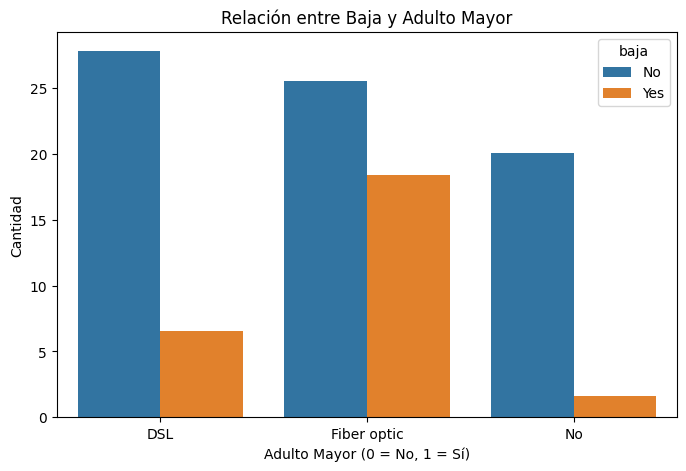

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="tipo_internet", hue="baja",stat="percent",fill=True)

plt.title("Relación entre Baja y Adulto Mayor")
plt.xlabel("Adulto Mayor (0 = No, 1 = Sí)")
plt.ylabel("Cantidad")
plt.show()

In [ ]:
df['tipo_internet'].value_counts(normalize=True)*100

,proportion
tipo_internet,
Fiber optic,43.958540
DSL,34.374556
No,21.666903


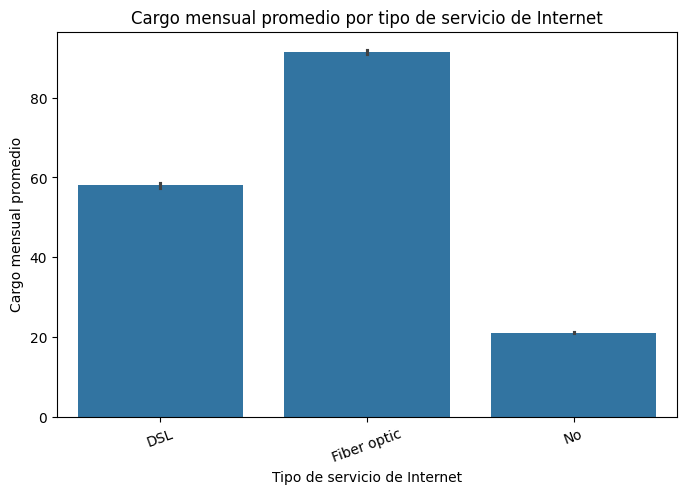

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.barplot(data=df, x="tipo_internet", y="cargo_mensual", estimator="mean")

plt.title("Cargo mensual promedio por tipo de servicio de Internet")
plt.xlabel("Tipo de servicio de Internet")
plt.ylabel("Cargo mensual promedio")
plt.xticks(rotation=20)
plt.show()
